In [2]:
%pip install matplotlib
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#import csv
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# find unique values of homeplanet
print(df_train['HomePlanet'].unique())

['Europa' 'Earth' 'Mars' nan]


In [8]:
print(df_train['Destination'].unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [5]:
df_num = df_train.select_dtypes(include='float64')
df_cat = df_train.select_dtypes(include=['object', 'bool'])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

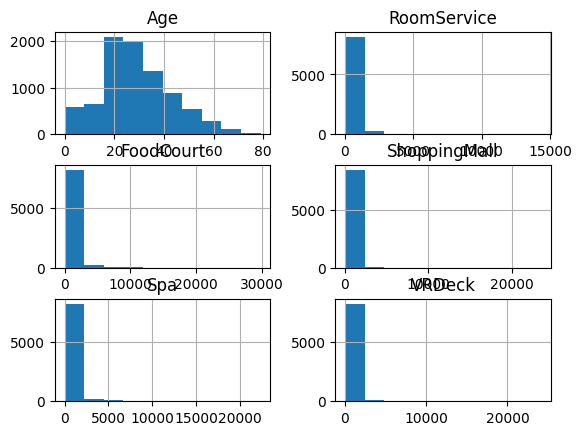

In [10]:
df_num.hist()

In [11]:
df_num['RoomService'].mean()

224.687617481203

In [13]:
df_num['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [14]:
df_num['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

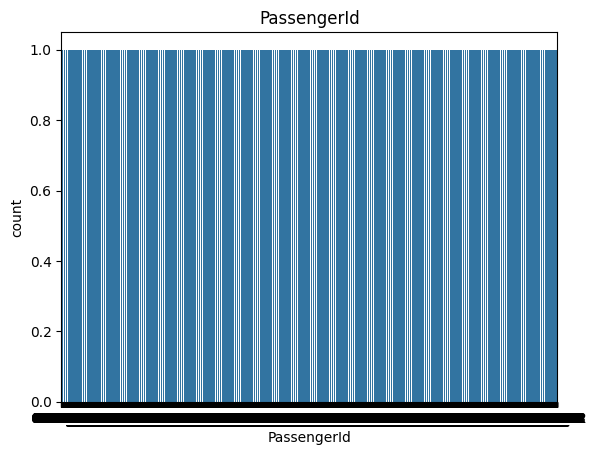

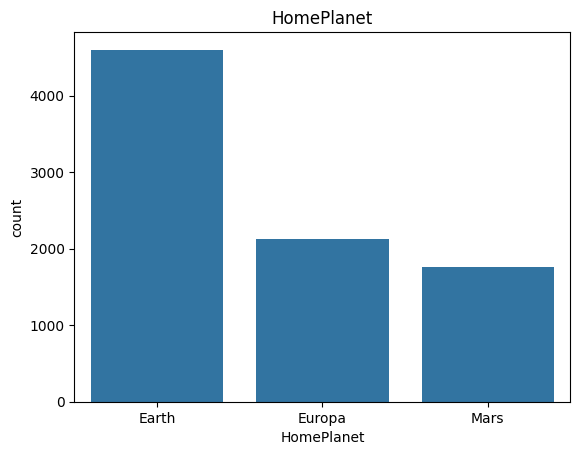

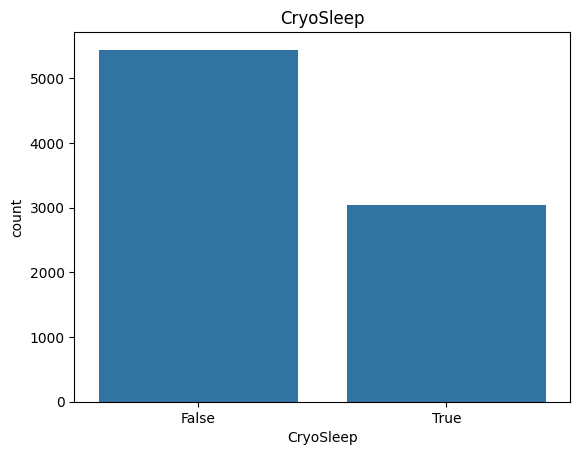

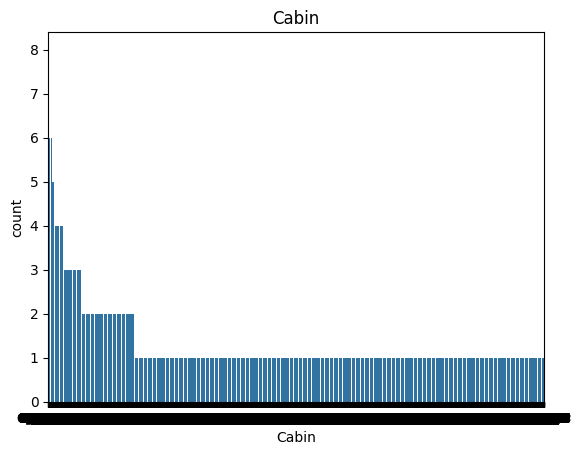

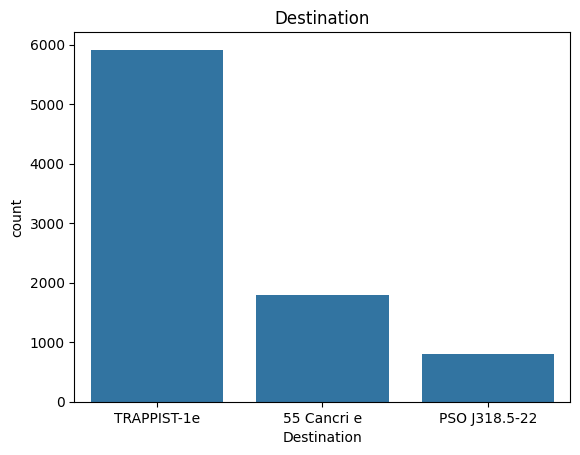

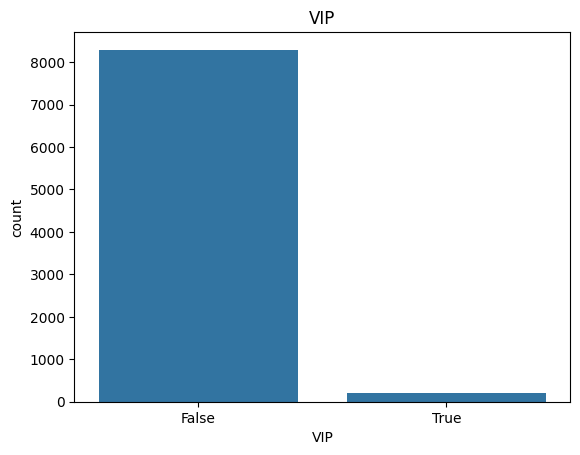

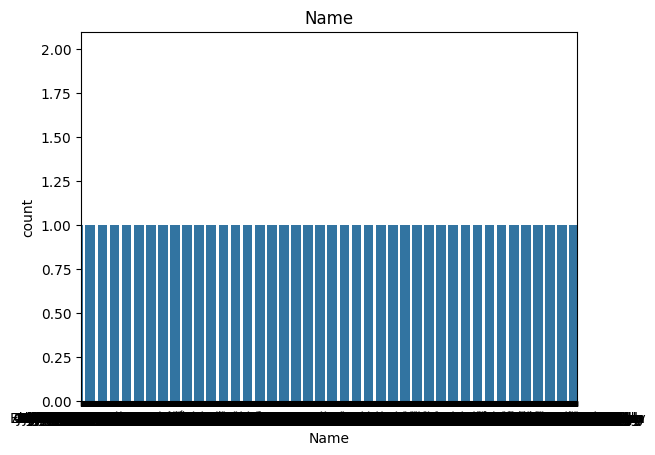

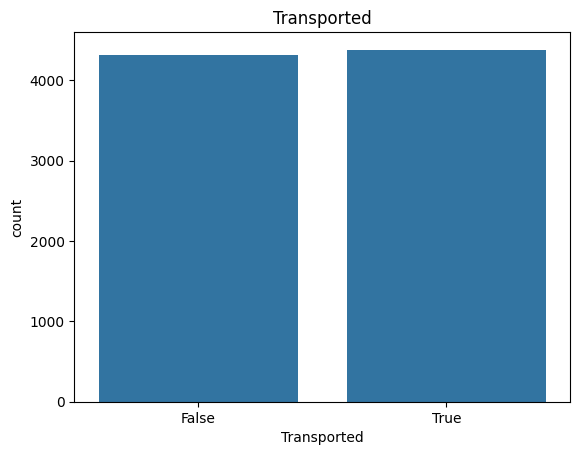

In [15]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts()).set_title(i)
    plt.show()

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


<Axes: >

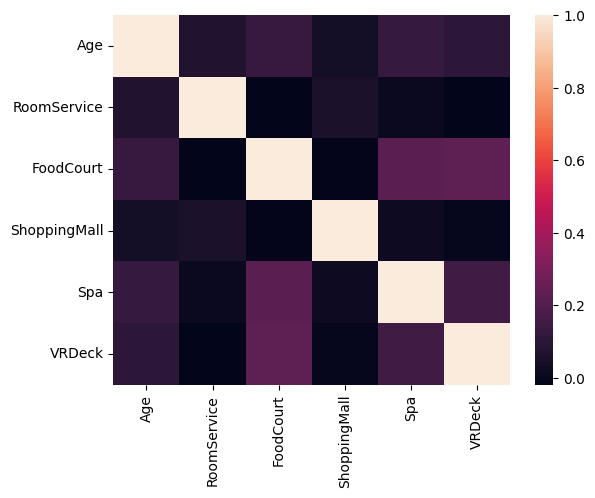

In [25]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [8]:
# delete the rows that has null values in 'Cabin' column

df_train = df_train.dropna(subset=['Cabin'])

In [9]:
# Fill null values in 'Age' column with its mean

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [10]:
# Fill null values in 'Name' column with 'Unknown'

df_train['Name'] = df_train['Name'].fillna('Unknown')

In [11]:
# Fill null values in all other columns with its mode
# For the five columns that represent money spent on each location, I did not substitute with its mean
# because 0 is default value and more than 50% of the data has value 0.

for column in df_train.columns:
    if column not in ['Age', 'Name', 'Cabin']:
        mode_value = df_train[column].mode()[0]
        df_train[column] = df_train[column].fillna(mode_value)

In [15]:
# compare tranportion rate of numerical variables

pd.pivot_table(df_train, index='Transported', values= ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.900275,375.167555,380.425261,163.915875,552.349479,532.291078
True,27.771017,520.646185,61.901782,175.147328,60.393559,67.600274


Similar average for ShoppingMall and Age but for FoodCourt, average of Transported is much higher.
Also for Roomservice, Spa, and VRDeck, average of false is significantly higher.

In [12]:
# function to print pivot table comparing to 'Transported'
def pvtable_transported(df, columns):
    for column in columns:
        print(pd.pivot_table(df, index='Transported', columns=column, values='PassengerId', aggfunc='count'))
        print()

In [14]:
# compare 'Transported' and each of categorical variables

cat_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
pvtable_transported(df_train, cat_col)

HomePlanet   Earth  Europa  Mars
Transported                     
False         2749     727   839
True          2054    1404   920

CryoSleep    False  True 
Transported              
False         3761    554
True          1895   2483

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                702            395         3218
True                1098            401         2879

VIP          False  True 
Transported              
False         4192    123
True          4302     76



HomePlanet:
    Earth: less likely
    Europa: more likely
    Mars: similar

CryoSleep:
    People who were on cryo sleep were way more likely to be transported
    and opposite for those who weren't

Destination:
    no significant difference (almost the same ratio)

VIP:
    similar for none VIP people 

Cabin column should be broken down into three parts.

In [ ]:
# break down entries in Cabin column
df_train['cabin_deck'] = df_train.Cabin.apply(lambda x:0)
